# Coursework EMAT30008 2024 #
Student no: 2113223

## Demos ##

Import packages and solver module "solvers"

In [303]:
import solvers
import numpy as np
import matplotlib.pyplot as plt
import timeit

### Question 1 ###
a) Throughout the solvers module, first order systems of ODEs are represented as a function f(x,t,p) of state variables x, time t and ode parameters p such that $ \frac{d\mathbf{x}}{dt} = f(\mathbf{x},t,\mathbf{p})$.

In [304]:
#Set up the Brusselator system as a function of x (numpy array), t (float) and parameters (numpy array)
def brusselator(x, t, p):
    dx = p[0] + x[0]**2 * x[1] - (p[1] + 1) * x[0]
    dy = p[1] * x[0] - x[0]**2 * x[1]
    return np.array([dx, dy])

#define parameters A and B and form parameter array p
A = 1
B = 3
p = np.array([A, B])

The function solve_to numerically integrates first order systems of ODEs from initial time t0 to final time t_f given an initial condition x0.

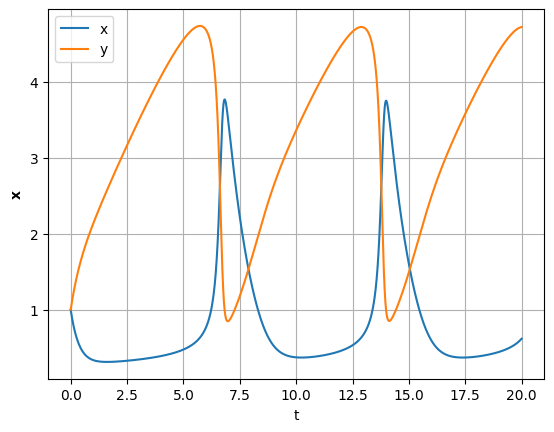

In [305]:
#Set up the initial conditions
x0 = np.array([1, 1])

#Set up t0 and t_f
t0 = 0
t_f = 20

#Solve system using default method (RK4) and time-step (1e-3)
x, t = solvers.solve_to(brusselator,p, x0, t0, t_f)

#plot the time series of x and y against t
plt.figure()
plt.plot(t, x[0, :], label = 'x')
plt.plot(t, x[1, :], label = 'y')
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.grid(True)
plt.legend()
plt.show()

b) The function shoot_solve numerically solves BVPs given boundary conditions and a phase condition (specified as functions of the ode, parameters p and the solution array from the numerical integration xs). The default funtion for the boundary condition is the limit cycle condition (xs[:,-1]-xs[:,0] = 0) and the default phase condition is $\frac{dx_1}{dt}\vert_{t=0} = 0$ (ode([xs[:,0]],0,p) = 0). From the plot, the starting point of the limit cycle that satisfies zero velocity in x looks like $\mathbf{x_{LC}} \approx \left[0.5, 3.5\right]$ and the period looks to be $T\approx 7.5$. Thus these will be the initial guesses provided to shoot_solve.

The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = 7.16.
The initial point on the limit cycle that satisfies the phase condition is [0.37 3.49].


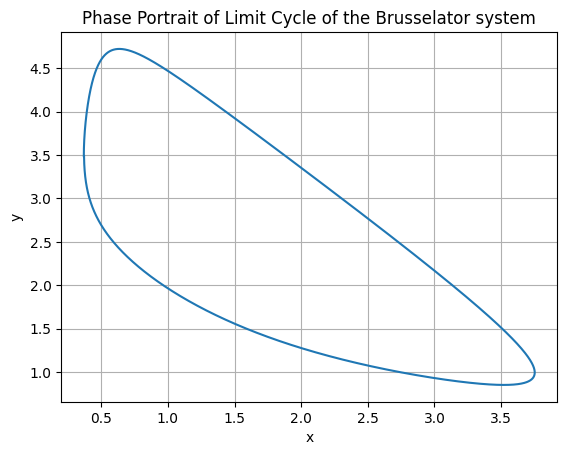

In [306]:
#set up initial guesses
x0 = np.array([0.5, 3.5])
T0 = 7.5
#use numerical shooting to find the point on the limit cycle
x_LC,T = solvers.shoot_solve(brusselator, p, x0,T0)

#Print the period T of the oscillations to 2 decimal places
print(f'The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.')
#Print the initial point on the limit cycle that satisfies the phase condition
print(f'The initial point on the limit cycle that satisfies the phase condition is {np.round(x_LC,2)}.')
xs,_ = solvers.solve_to(brusselator, p, x_LC, t0, T)
#Plot x against y for 1 period of the oscillations.
plt.figure()
plt.plot(xs[0,:], xs[1,:])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait of Limit Cycle of the Brusselator system')
plt.grid(True)
plt.show()

c) The function bifurcation_analysis tracks attractors of systems of ODEs. It does this using natural parameter or pseudo-arclength continuation (default is natural parameter continuation). The boolean input variable LC can be set to False and only equilibria will be tracked. This increases computational speed as shooting is not required, but in our case we are interested in limit cycles. The initial parameter array p0, the index p_ind of the varying parameter within the parameter array must be specified, as well as the number of steps N and the size of the natural parameter steps h. An initial guess x0 for the attractor (point on the LC or equilibrium) must be provided, and, when computing limit cycles, a positive number T0 must be provided as an initial guess for the period of the limit cycle. We will use the output of part b) as the initial guesses for the limit cycle at B = 3. The phase condition used is again the default phase condition.

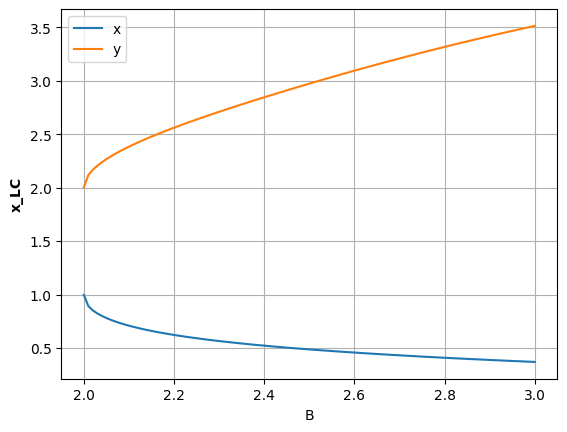

In [307]:
#Set up the initial array of parameters p0
B0 = 3
p0 = np.array([A, B0])

#We use step size of h = 1e-2 for the natural parameter continuation.
#The step must be negative to move B = 2.
h=-1e-2

#The number of iterations to reach B = 2 is computed
Bend = 2
N = int((Bend-B0)/h)

x0 = x_LC
T0 = T

#We use natural parameter continuation to find the branch of LCs that emerges from the Hopf bifurcation at B = 2
xs, Ts, ps = solvers.bifurcation_analysis(brusselator, p0,x0,p_ind = 1, T0 = T0, N=N, h = h)

#Plot the x and y values of the limit cycles against B
plt.figure()
plt.plot(ps[1,:], xs[0,:], label = 'x')
plt.plot(ps[1,:], xs[1,:], label = 'y')
plt.xlabel('B')
plt.ylabel('x_LC', fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

### Question 2 ###
The extended Hopf bifurcation normal form is set up as a function of x, t and p.

In [308]:
#Set up the extended Hopf Bifurcation normal form
def hopf(x, t, p):
    r_squared = (x**2).sum()
    dx = p[0] * x[0] - x[1] - x[2] + x[0] * r_squared - x[0] * r_squared**2
    dy = x[0] + p[0] * x[1] - x[2] + x[1] * r_squared - x[1] * r_squared**2
    dz = x[0] + x[1] + p[0] * x[2] + x[2] * r_squared - x[2] * r_squared**2
    return np.array([dx, dy, dz])

a) The solve_to function is used to perform numerical integration, again using default Runge-Kutta 4th order solver with default max step size of 0.01.

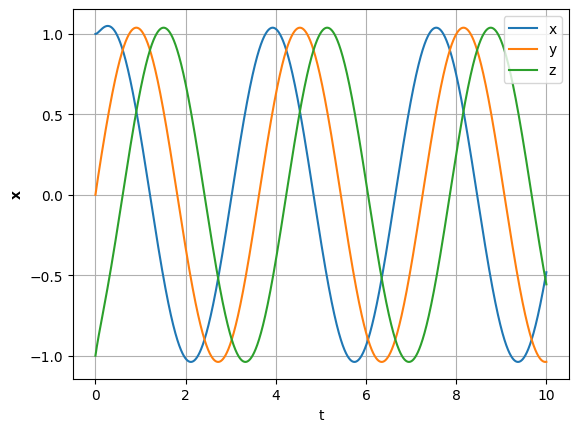

In [309]:
#Set up the parameter value,
beta = 1
#initial conditions,
x0 = np.array([1, 0, -1])
#and time domain,
t0 = 0
t_f = 10

#Solve the system using the RK4 method
x, t = solvers.solve_to(hopf, beta, x0, t0, t_f)

#Plot the time series of x, y and z against t
plt.figure()
plt.plot(t, x.T, label = ['x','y','z'])
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.legend()
plt.grid(True)
plt.show()

b) Numerical shooting function shoot_solve is used again with default phase condition. The initial guess for point on the limit cycle satisfying zero velocity in x is inferred from the time series plot as $\mathbf{x_{LC}} \approx \left[-1.2, -0.5, 0.7\right]$ and the initial guess is $T \approx 4$.

The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = 3.63.
The initial point on the limit cycle that satisfies the phase condition is [-1.05 -0.51  0.51].


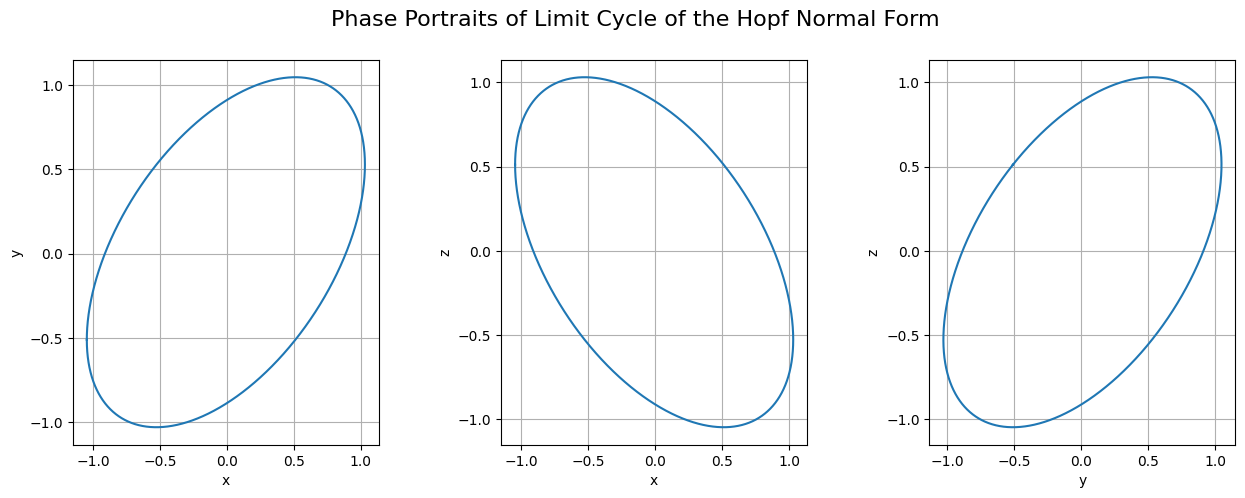

In [310]:
x0 = np.array([-1.2,-0.5,0.7])
T0 = 4
x_LC,T = solvers.shoot_solve(hopf, beta, x0,T0, delta_max = 1e-3)

print(f"The period of the oscillations of the limit cycle, rounded to 2 decimal places, is T = {round(T,2)}.")
print(f"The initial point on the limit cycle that satisfies the phase condition is {np.round(x_LC,2)}.")


#Numerically integrate limit cycle
xs,t = solvers.solve_to(hopf, beta, x_LC, t0, T, delta_max = 1e-3)

#plot phase portraits
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

axs[0].plot(xs[0, :], xs[1, :])
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

axs[1].plot(xs[0, :], xs[2, :])
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].grid(True)

axs[2].plot(xs[1, :], xs[2, :])
axs[2].set_xlabel('y')
axs[2].set_ylabel('z')
axs[2].grid(True)

fig.suptitle('Phase Portraits of Limit Cycle of the Hopf Normal Form', fontsize=16)
plt.show()

The time series of one oscillation of the limit cycle is plotted to ensure the correct limit cyle was found.

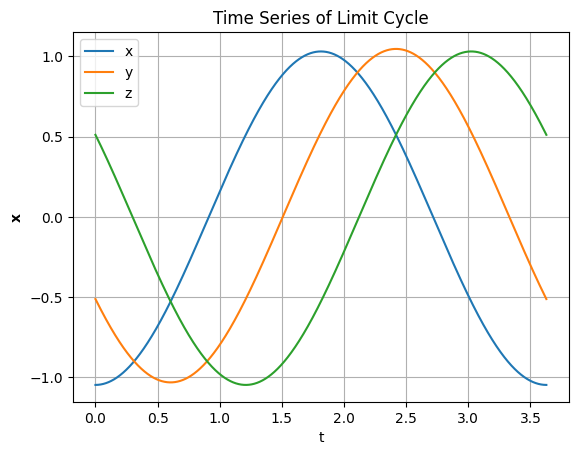

In [311]:
plt.figure()
plt.plot(t,xs.T, label = ['x','y','z'])
plt.xlabel('t')
plt.ylabel('x', fontweight = 'bold')
plt.grid(True)
plt.legend()
plt.title('Time Series of Limit Cycle')
plt.show()

c) The same function as in 1.c) "bifurcation_analysis" will be used to find the branches of limit cycles that emerge from the Hopf bifurcation at $\beta = 0$. To employ pseudo-arclength continuation, the kwarg "cont_type" is set to "pseudo_arclength" as the default value performs natural parameter continuation. The values for initial step size and the number of iterations were chosen as to strike a balance between computation time and smoothness of the bifurcation diagram, ensuring that the dynamics of the system around beta = 0 are fully captured. Again, initial value h must be negative to send the continuation towards the bifurcation point at $\beta = 0$.

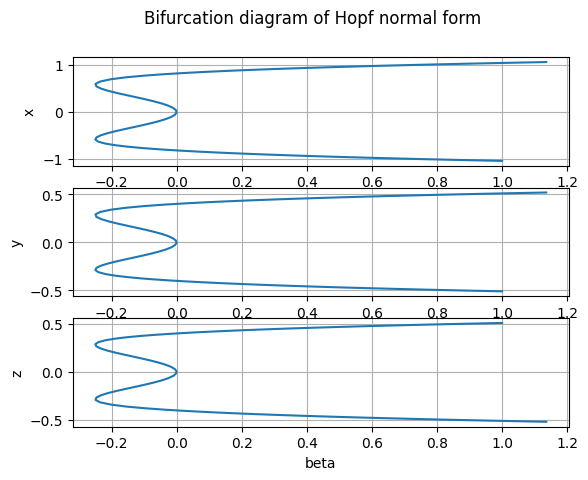

In [312]:
#We will use the outputs x_LC and T of the shooting method initial guesses for the pseudo-arclength continuation.
x0 = x_LC
T0 = T


#set up initial natural parameter continuation step size (innit_h) and number of pseudo-arclength steps (innit_h)
innit_h = -5e-2
no_it = 75

#set up cont_type parameter to pseudo-arclength continuation
cont_type = "pseudo_arclength"
#run bifurcation_analysis with pseudo-arclength continuation
xs, Ts, ps = solvers.bifurcation_analysis(hopf, beta, x0, T0 = T0, h = innit_h, N = no_it, cont_type = cont_type)


#Plot the x, y and z values of the limit cycles against beta
plt.figure()
plt.subplot(311)
plt.plot(ps[0,:],xs[0,:], label = 'x')
plt.ylabel('x')
plt.grid(True)

plt.subplot(312)
plt.plot(ps[0,:],xs[1,:], label = 'y')
plt.ylabel('y')
plt.grid(True)

plt.subplot(313)
plt.plot(ps[0,:],xs[2,:], label = 'z')
plt.ylabel('z')
plt.xlabel('beta')
plt.suptitle('Bifurcation diagram of Hopf normal form')
plt.grid(True)
plt.show()


### Question 3 ###
The finite_diff function solves second order ODEs of the form $D\frac{d^2u}{dx^2} + P \frac{du}{dx} + q((u),x,p) = 0$. As there is no dependency on u in the source term, the source term is just a function of space variable $x$ and parameter arary $p$. The boundary conditions are input to the solver as Boundary_Condition objects.

In [313]:
#Define source term q(x,sig) as a function of x and sig.
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#Define the boundary conditions as Boundary_Condition objects.
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#We set the diffusion coefficients D=1 and P =0
D = 1
P=0

a) For 51 grid points, a value of $N=50$ is input to the solving function. The linear system arising from finite differencing is solved using Numpy for $\sigma = 0.5$ and Scipy's sparse linear system solver for $\sigma = 0.1$.

The value of u(x) at x = 0.0 for sig = 0.5, to 5 significant figures, is -0.69513.
The value of u(x) at x = 0.0 for sig = 0.1, to 5 significant figures, is -0.53936.


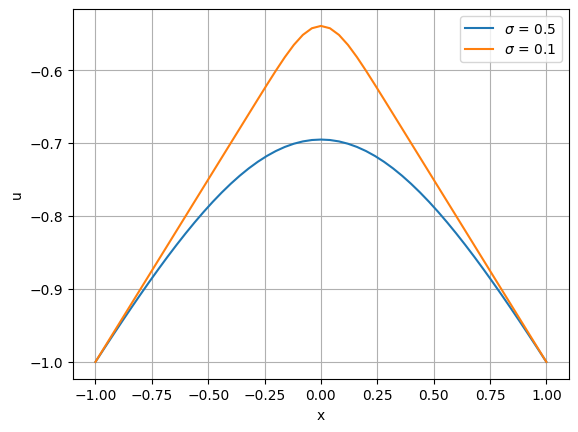

In [314]:
N=50
#i)
#Define the value of parameter sig = 0.5,
sig = 0.5
#and use numpy linear solver.
solver = "np_solve"

#Solve the system using the second order solver.
u_np,x = solvers.finite_diff(bc_left, bc_right, q, sig, N, D=D, P=P, solver = solver)

#We want to print u(x) at x = 0.
#As x = 0 is the 25th grid point, we print u_np[25].
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_np[25],5)}.")


#ii)
#Define the value of parameter sig = 0.1,
sig = 0.1
#and use the scipy sparse matrix linear solver.
solver = "sparse"
u_sparse,x = solvers.finite_diff(bc_left, bc_right, q, sig, N, D=D, P=P, solver = solver)
print(f"The value of u(x) at x = {x[25]} for sig = {sig}, to 5 significant figures, is {round(u_sparse[25],5)}.")

#We plot the solutions u(x) for sig = 0.5 and sig = 0.1.
plt.plot(x,u_np,label = f"$\sigma$ = 0.5")
plt.plot(x,u_sparse,label = f"$\sigma$ = 0.1")
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()

b) The setup code is the same for both solvers. For 501 grid points, a value of $N=500$ is input to finite_diff. To get an accurate value for the time taken to run each method, they are run 25 times each and the total time is divided by 25.

In [315]:
#Define setup code as a docstring
setup = """
import solvers
import numpy as np
def q(x,sig):
    return 1/(np.sqrt(2*np.pi*sig**2))* np.exp(-x**2/(2*sig**2))

#setup both boundary conditions
bc_left = solvers.Boundary_Condition("Dirichlet",-1,-1)
bc_right = solvers.Boundary_Condition("Dirichlet",1,-1)

#initialise parameters of the problem
N = 500
sig = 0.05
D = 1
P=0
"""

#Define timed code for each method
timed_code_np = """
#define the solver to be used
solver = "np_solve"
u,x = solvers.finite_diff(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""
timed_code_sparse = """
#define the solver to be used
solver = "sparse"
u,x = solvers.finite_diff(bc_left,bc_right,q,sig,N,D=D, solver = solver)
"""

#Time the code for 25 iterations and calculate the time taken per iteration.
number = 25
time_np = timeit.timeit(setup = setup, stmt = timed_code_np, number = number)
time_sparse = timeit.timeit(setup = setup, stmt = timed_code_sparse, number = number)

print("Numerical integration using the numpy linear system solver took on average {0:.2f} ms. to run.".format(1000 * time_np/number))
print("Numerical integration using the scipy sparse matrix linear system solver took on average {0:.2f} ms to run.".format(1000 * time_sparse/number))

Numerical integration using the numpy linear system solver took on average 187.72 ms. to run.
Numerical integration using the scipy sparse matrix linear system solver took on average 1.39 ms to run.


Scipy's sparse linear system solver was a lot faster than numpy's dense matrix linear system solver. This can be explained by the fact the linear system being solved is large (499x499) and the matrices are tridiagonal and, thus, have a lot of zero values.

### Question 4 ###
The PDE solver meth_lines solves problems of the form $\frac{\partial u}{\partial t} =  D\frac{\partial^2u}{\partial x^2} + P \frac{\partial u}{\partial x} + q(u,x,t,p)$, given boundary conditions as Boundary_Condition objects and initial condition $u(x,t_0) = f(x,t_0)$. Again, for 101 equally spaced grid points in the x variable, $N=100$.

In [316]:
#Define problem parameters
D = 0.5
P=0
L =2
t0,T = 0, 0.5
N = 100

#define the source term q(x,t) = 0
def q(x,t,p):
    return np.zeros(len(x))

#setup boundary conditions
bc_left = solvers.Boundary_Condition("Neumann",0,1)
bc_right = solvers.Boundary_Condition("Dirichlet",L,0)

#define initial condition f(x,t0) = u(x,0)
def f(x,t0):
    return  0.5 * x * (L - x)

a)    
The maximum time step that can be used in the explicit Euler method is given by $\Delta t_{max} = \frac{(\Delta x)^2}{2D}$, where $\Delta x$ is the step size of the discretisation of the space variable and $D$ is the diffusion coefficient. The value of $\Delta x$ is found using the Grid object that is usualy formed within the PDE solver. It takes as inputs $N$,$x_0$, and $x_N$.

In [317]:
#Compute discretisation of space by making a Grid object
grid = solvers.Grid(N,0,L)
#Extract dx from grid object
dx = grid.dx

#Compute maximum step size that can be used for explicit Euler method 
dt_max = dx**2/(2*D)
print(f"The maximum time step size for the explicit Euler method is$ {dt_max}.")

The maximum time step size for the explicit Euler method is$ 0.0004.


b) The PDE solver has a boolean kwarg method which determines wether the numerical integration in time is computed using explicit, implicit or imex methods. The variable explicit_solver determines which method is used in the ex^licit time integration (Euler or RK4). Variable linear_solver determines which linear solver is used to solve the linear systems arising from the implicit or IMEX Euler method. In this question, the Thomas algorithm (default linear solver) is used to solve the system arising from the implicit Euler method.

The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is -0.2496. 
The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is -0.2496. 


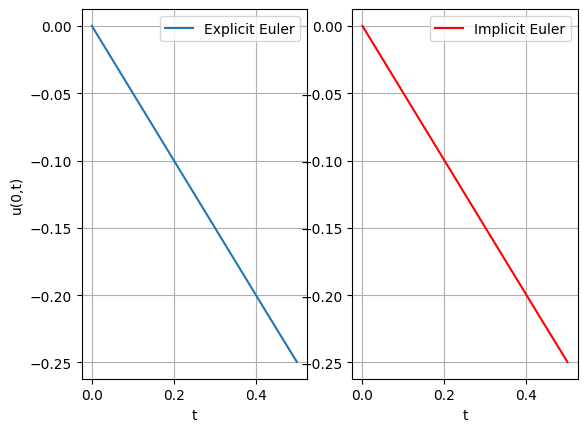

In [318]:
#i)
#Define time step size and solver for explicit Euler method
dt_explicit = 0.5 * dt_max 
method = "explicit"
explicit_solver = "Euler"

#Solve the system using the explicit Euler method
u_explicit,x,t_explicit = solvers.meth_lines(bc_left, bc_right, f, t0, T, q, p = 0, N=N, D = D, P=P, dt = dt_explicit, method = method, explicit_solver = explicit_solver)

#The first dimension of the solution array u_explicit is the spatial dimension, 
#and the second dimension is the time dimension. Thus the value of u(0,T) is u_explicit[0,-1].
print("The value of u(0,T) for the explicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_explicit[0,-1]))


#ii)
#Define time step size and solver for implicit Euler method.
dt_implicit = 2 * dt_max
method = "implicit"

#Solve the system using the implicit Euler method
u_implicit,x,t_implicit = solvers.meth_lines(bc_left, bc_right, f, t0, T, q,p = 0, N=N, D = D, P=P, dt = dt_implicit, method = method)
print("The value of u(0,T) for the implicit Euler method, rounded to 5 significant figures, is {0:.4f}. ".format(u_implicit[0,-1]))

#Plot u(0,t) against t for both methods
plt.figure()
plt.subplot(121)
plt.plot(t_explicit,u_explicit[0,:], label = "Explicit Euler")
plt.xlabel('t')
plt.ylabel('u(0,t)')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.plot(t_implicit,u_implicit[0,:],color = 'r', label = "Implicit Euler")
plt.xlabel('t')
plt.legend()
plt.grid(True)
plt.show()

### Question 5 ###
As the source term is now non-linear, it is defined as a function of u, x, t and p.

In [319]:
#Define the parameters of the problem
D = 0.01
L = 6
T = 100
p=np.nan
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)

#Define the reaction term q(u,x,t,p)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)

#Define initial condition f(x,t0)
def f(x,t0):
    return np.zeros(len(x))


a)     
The problem will be solved using the explicit Runge-Kutta 4th order method, the purely implicit Euler method and the IMEX Euler method. The system arising from the implicit methods are solved using the default solver, i.e. the Thomas algorithm. The function meth_lines automatically chooses a stable value for dt in explicit methods so no time step will be input.

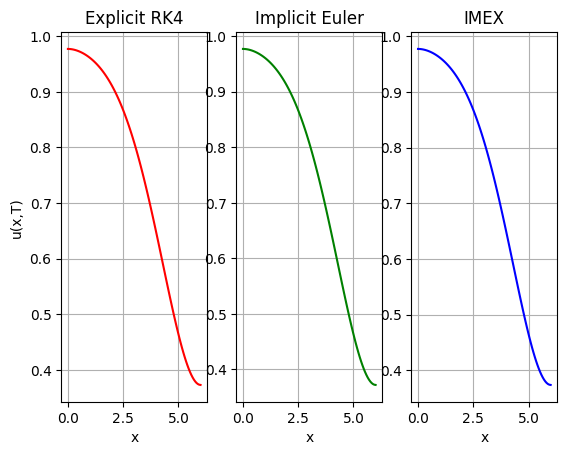

In [320]:
N = 100
#explicit RK4
method = "explicit"
explicit_solver = "RK4"
u_expl, x_expl, t_expl = solvers.meth_lines(bc_left, bc_right, f, 0, T, q, p, N, D = D, P = P, method = method, explicit_solver = explicit_solver)

#set dt for implicit methods
dt = 0.5
method = "implicit"
u_impl, x_impl, t_impl = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D, P = P, method = method, dt = dt)

method = "imex"
u_imex, x_imex, t_imex = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D, P = P, dt = dt)

#Plot u(x,t) at t = T for all three
plt.figure()
plt.subplot(131)
plt.plot(x_expl, u_expl[:,-1], color = "r")
plt.xlabel('x')
plt.ylabel('u(x,T)')
plt.title('Explicit RK4')
plt.grid(True)
plt.subplot(132)
plt.plot(x_impl,u_impl[:,-1],color = "g")
plt.xlabel('x')
plt.title('Implicit Euler')
plt.grid(True)
plt.subplot(133)
plt.plot(x_imex,u_imex[:,-1],color = "b")
plt.xlabel('x')
plt.title("IMEX")
plt.grid(True)
plt.show()
#plot solution

b)     
Time the code using timeit function.

In [321]:
setup_code = """
import solvers
import numpy as np
D = 0.01
P=0
L = 6
T = 100
p=np.nan
bc_left = solvers.Boundary_Condition("Neumann",0,0)
bc_right = solvers.Boundary_Condition("Neumann",L,0)
def q(u,x,t,p):
    return (1-u)**2 * np.exp(-x)
def f(x,t0):
    return np.zeros(len(x))
N = 100
dt = 0.5
"""
timed_explicit = """
method = "explicit"
explicit_solver = "RK4"
u_expl, x_expl, t_expl = solvers.meth_lines(bc_left, bc_right, f, 0, T, q, p, N, D = D, P = P, method = method, explicit_solver = explicit_solver)
"""
timed_implicit = """
dt = 0.5
method = "implicit"
u_impl, x_impl, t_impl = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D, P = P, method = method, dt = dt)
"""
timed_imex = """
dt = 0.5
method = "imex"
u_imex, x_imex, t_imex = solvers.meth_lines(bc_left, bc_right, f,0,T, q , p, N, D = D, P = P, dt = dt)
"""

number = 5
time_explicit = timeit.timeit(setup = setup_code, stmt = timed_explicit, number = number)
time_implicit = timeit.timeit(setup = setup_code, stmt = timed_implicit, number = number)
time_imex = timeit.timeit(setup = setup_code, stmt = timed_imex, number = number)

print("The explicit method took {0:.5f}s. on average.".format(time_explicit/number))
print("The implicit method took {0:.5f}s. on average.".format(time_implicit/number))
print("The IMEX method took {0:.5f}s. on average.".format(time_imex/number))

The explicit method took 0.50464s. on average.
The implicit method took 2.12096s. on average.
The IMEX method took 0.07489s. on average.


Thus, to solve the problem 100 times in a row, I would use the IMEX method as it is the fastest method and is stable in $\Delta t$.


c)   
Given the plots in part a),  $u(L,T) \approx 0.35$, thus accuracy to 4 significant figures means accuracy to $10^-4$. The explicit Euler method is first-order accurate in time and second order acurate in space. Therefore, to compute $u(L,T)$ accurately to 4 decimal places, we would need $dx = 10^{-2}$ and $dt = 10^{-4}$. This is prohibitively slow in the solvers package due to the consistent treatment of boundary values and source-terms as time-dependent functions. Instead, we will use Scipy's solve_ivp function in our time-integration, more particularly the "RK45" method, which reduces time discretisation error to $\mathcal{O((\Delta t))^4}$. Thus, a value of $\Delta t = 10^{-1}$ should be sufficient to assure accuracy in the time discretisation. A value of $N = 300$ is chosen such that $\Delta x = 0.05 $. This value of N is lower than it should be (600) to ensure the correct accuracy but it the maximum value that runs in a feasible amount of time.

In [322]:
#set up array of Ns
N = 300
dt = 1e-1
u,xs,ts = solvers.meth_lines(bc_left, bc_right, f, 0, T, q, p, N, D = D, P=0,dt=dt, method = "explicit",num_int_name = "solve_ivp", explicit_solver = "RK45")
print("The value of u(L,T) to 4 significant figures, using explicit RK45 is {:.5f}.".format(u[-1,-1]))


The value of u(L,T) to 4 significant figures, using explicit RK45 is 0.37294.


The problem is also solved using the IMEX Euler method as it enables smaller grid spaces in the discretisation of space and time. This method is of lower order in time. However, as the source term is dependent on x and not t, this could provide a more accurate answer due to a smaller $\Delta x$. The decrease in the order of accuracy in $\Delta t$ is also offset by the ability to have a smaller time-step while keeping reasonable computational time. Values of $N=600$ $\left(\Delta x = 0.01 \right)$ and $ \Delta t = 5 \times 10^{-3} $ are used.

In [323]:
N = 600
grid = solvers.Grid(N,0,L)
dt = 5e-3
u,xs,ts = solvers.meth_lines(bc_left, bc_right, f, 0, T, q, p, N, D = D, P=0,dt=dt, method = "imex", linear_solver = "sparse")
print("The value of u(L,T) to 4 significant figures, using implicit Euler with the sparse linear solver is {:.5f}.".format(u[-1,-1]))

The value of u(L,T) to 4 significant figures, using implicit Euler with the sparse linear solver is 0.37295.


Given these 2 results, we can be fairly confident that $u(L,T) = 0.3729$ to 4 significant figures.

### Question 6 ###
a)     
The finite difference solver solves systems of the form
$ D\frac{d^2u}{dx^2} + P \frac{du}{dx} + q(x,p) = 0 $.
Therefore, the input P to the finite_diff function will be the negative of the value P of the problem.

The maximum value of u for P = 1 is 0.5.
The maximum value of u for P = 10 is 0.7392707558635478.
The maximum value of u for P = 50 is 0.9177831761506429.


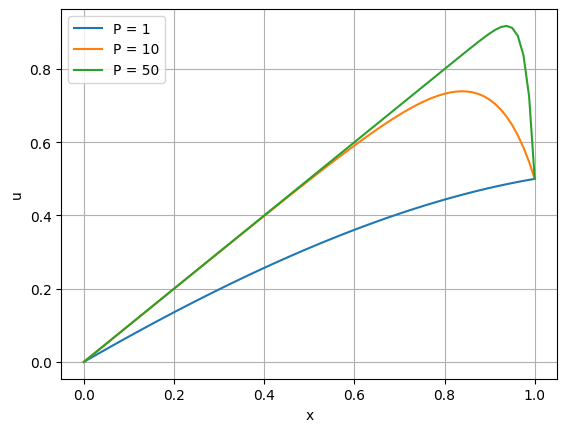

In [324]:
#Set up problem parameters
D = 1
N=80
def q(x,p):
    return np.zeros(len(x)) + p
bc_left = solvers.Boundary_Condition("Dirichlet",0,0)
bc_right = solvers.Boundary_Condition("Dirichlet",1,0.5)

#set up values of P
ps = [1,10,50]


#for each value of P numerically solve the problem, plot the solution and print the max value of u
for p in ps:
    u,x = solvers.finite_diff(bc_left,bc_right,q,p,N=N,D=D,P=-p)
    plt.plot(x,u,label = f"P = {p}")
    print(f"The maximum value of u for P = {p} is {u.max()}.")
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)
plt.show()


b)
To use the natural parameter continuation function, a residual function f must be defined as $f(u_{max},p) = 0$ when u_max is the maximum value of u. The IMEX method with the Thomas linear solver is employed for its speed as we are performing many integrations.

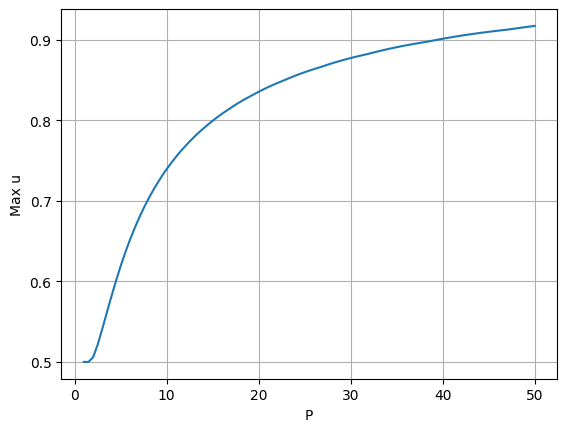

In [325]:
#define a function that is zero when the input is the maximum value of u
def f(u_max,p):
    u,x = solvers.finite_diff(bc_left,bc_right,q,p,N=N,D=D,P=-p)
    return u.max() - u_max

# start at p0 = 1 
p0 = 1
#compute first max value of u
u_max0 = 0.5

#last value of natural parameter continuation is 50
pend = 50

#define step size:
h=0.5

#determine N to reach 50
N = int((pend - p0)/h)

#use natural parameter continuation to find the max value of u for every p
u_max,ps = solvers.parameter_continuation("natural",f,p0,u_max0,h=h,N=N)

#plot the max values of u against p
plt.plot(ps[0,:],u_max[0,:])
plt.xlabel('P')
plt.ylabel('Max u')
plt.grid(True)
plt.show()

## Software Decisions ## 
(946 words)

### General Practices ###
The solvers package was created based on the core principle of easy usability. Thus, functions include default values that enable users to perform a variety of common high-level tasks. However there is also a high degree of modularisation that allows users to perform more specific tasks or to specify particular methods to be used in the high level tasks. Throughout the package, generality of code is prioritised over time efficiency. This choice was made so that the mathematical principles behind the various computations are apparent when reading the source code. When possible, matrix representations of systems were prioritised to harness speed-ups from the efficient manipulation of arrays provided by the Numpy package, which forms the basis of the solvers package. When root solving was required on arbitrary functions, Scipy's f_solve was used as it provides robust and reliable roots to non-linear functions and is easy to use and to understand.

### Ease of Use ###
One of the core principles of the solvers package is to be easy to use for a variety of common problems. Thus, the function shoot_solve can solve any boundary value problem but is set up by default to identify points on the limit cycle of ODEs. Similarly bifurcation_analysis set up numerical continuation for the specific goal of analysing bifurcations in systems of ODEs. The user can easily specify what kind of continuation to use through the "cont_type" kwarg and the stable phase condition $\left(\frac{dx_1}{dt}\mid_{t=0} = 0\right)$ is implemented by default. The functions employing finite differencing to solve ODEs (finite_diff) and PDEs (meth_lines) also follow the principles of easy usability. They both set up the discretisation matrix and vector based on the boundary conditions provided without requiring further user input. Both functions also adapt the solving methods used based on the source term. For example, in the ODE solver, if a non-linear source term is provided, the solution is automatically computed using the Newton method. Whereas if a linear source term is provided, the linear system is simply solved.
Another aspect of the emphasis on usability is the use of ValueErrors to catch out wrong inputs and give useful error messages to guide the user.
Despite the ease of use of the package through high-level functions, default values and guidance on errors, the solvers package also allows for a lot of configurability and the modularistation of functions makes it useful for applications in a wide range of tasks.

### Versatility and Modularisation ###
There is a wealth of low-level functions in the solvers package which can be used by users for a variety of tasks. These include parameter continuation (natural and pseudo-arclength) on arbitrary functions, discretisation functions (based on max step size delta_max in discr_t or on total number of values N in the initialisation function of the Grid object) and multiple single-step functions (euler and rk4 integration, pseudo-arclength and natural parameter) continuation. The higher level functions also allow for configurability. Anytime numerical integration is involved in a process, the choice of integrator and method is provided through the "num_int_name" and "solver" (or "explicit_solver" in the PDE solver) kwargs. Four linear solvers are available in contexts when linear systems are solved and tolerances are modifiable (when they're not given a fixed value for stability purposes).

### Generality ###
The package was written with the intention of functions being applicable to a wide variety of problems, without repeating code. This ambition was sometimes prioritised over computational efficiency. For example in the initialisation function of the Boundary_Condition class, all boundary values inputted are transformed into constant functions of time, and are treated as functions of time for future computations. The construct_A_diags_b function is another example of this approach to the code. It constructs the diagonals of tridiagonal matrix $\mathbf{A}$ and the vector $\mathbf{b}$ to represent expressions of the form $D\frac{\partial^2u}{\partial x^2} + P\frac{\partial u}{\partial x}$ as a vector/matrix expression $\mathbf{Au} + \mathbf{b}$. This is done by first constructing matrices $\mathbf{A_{first}}$ and $\mathbf{A_{second}}$, and vectors $\mathbf{b_{first}}$ and $\mathbf{b_{second}}$ such that the expression is represented by $\frac{D}{\left(\Delta x\right)^2}\left(\mathbf{A_{second}u} + \mathbf{b_{second}}\right) + \frac{P}{2\Delta x}\left(\mathbf{A_{first}u} + \mathbf{b_{first}}\right)$. Through the distributive properties of matrix and scalar multiplication over matrix addition, we get the expression $\left(\frac{D}{\left(\Delta x\right)^2}\mathbf{A_{second}} + \frac{P}{2\Delta x}\mathbf{A_{first}}\right)\mathbf{u} + \frac{D}{\left(\Delta x\right)^2}\mathbf{b_{second}} + \frac{P}{2\Delta x}\mathbf{b_{first}}$ which constitutes the general vector/matrix representation of the expression expressed earlier: $\mathbf{Au} + \mathbf{b}$. The boundary values only affect the values of the vector and the main diagonal. Thus, these are returned as vector functions of time and the off-diagonals are returned as arrays of numbers. The size of these arrays, and therefore the size of the system solved, is determined by the type of the boundary conditions. Thus, variables left_ind and right_ind are also output by the construct_A_diags_b function so that the rest of the code (in the ODE or PDE solver) can input the correct range of x values to source-term functions without additional redundant if statements. Keeping matrix $\mathbf{A}$ in terms of its diagonals also serves the generality of the code. This is due to the fact a couple of the linear system solvers (Thomas algorithm and sparse linear solver) work with the diagonals directly and the other solvers are wrapped in a function that reconstructs the matrix from the diagonals.
This general emphasis on code that can be used for a wide variety of problems has the benefit of avoiding an abundance of if statements and of making the code more readable. However, it has adverse effects on the computational speed of functions when time-dependency isn't required but the functions are setup for it anyway or when the problem has no 1st order term but $\mathbf{A_{first}}$ and $\mathbf{A_{second}}$ are computed anyway, before being multiplied by 0.

# Reflective Learning Log #
(600 words)

### Software Engineering ###
Being the largest piece of software I have ever built, this project has been a challenging and rewarding lesson in software engineering skills. I have used GitHub before in the context of group projects, but this is the first time I have been made aware of the importance of small regular commits. Towards the beginning of the year I caught myself a few times making progress on some questions within the first hour of a work session, trying to improve upon it to make it more general/modularise it, breaking the whole code, and spending another hour getting back to where I was originally. These frustrations and hours of wasted work got me in the habit of committing at every milestone to ensure a record of work completed. An aspect of software engineering I have never been aware of is unit testing. I learnt how to write unit tests with the unittest package, how to set up a yaml file to run them automatically on push, given requirements defined in a txt file. However, I definetly didn't use them to their full potential as I was slightly in the dark as to what tests to perform on my code and the time-constraints of the coursework led me to focus more on other aspects of the project. This is also the first time I have created a piece of code for a general use as opposed to tailoring it for a specific task. This was challenging as I sometimes took decisions without considering their ramifications on later work. For example, I originally coded ode_state as an object with x and t attributes as it made the solve_to function cleaner. However this quickly became unworkable when the solve_to function was included in larger, more complex applications and I was having to form new instances of the objects many times in long for loops. In a similar way, the functions for numerical shooting and parameter continuation were originally written with limit cycle detection hard-encoded. This meant that the code wasn't very adaptable and could be quite confusing to read. Modularising these functions also had the added effect of speeding them up significantly, particularly the pseudo-arclength continuation. This is probably due to some redundant computations or extra unnecessary function calls. In later functions I made sure to consider generality when writing the code, thus making the task of expanding functionality less challenging.
### Numerical Methods ###
Before this course, I knew of some numerical methods such as the Euler and Runge Kutta methods for numerical integration, 1st order finite difference methods for numerical differentiation and the Newton method for root solving given a defined derivative. It was interesting to discover the numerical approximations to second order derivatives. I had never considered the power of expressing these methods as linear systems and it was interesting to see how second order differential equations could be written in terms of matrix multiplication and vector addition and how this formulation allows for linear algebra methods to be used within numerical methods. The expression of the Newton method as a linear system in terms of Jacobians was particularly appealing as it formed an interesting cross-section between numerical methods and and linear algebra. I was impressed at the simplicity involved in extending these methods to PDEs as, for the non-linear cases, it just involved using both methods one after the other. Another aspect of numerical methods I have become more aware of is their computational time. This had to be balanced against the accuracy of methods with different discretisations in a way I have never encountered before.